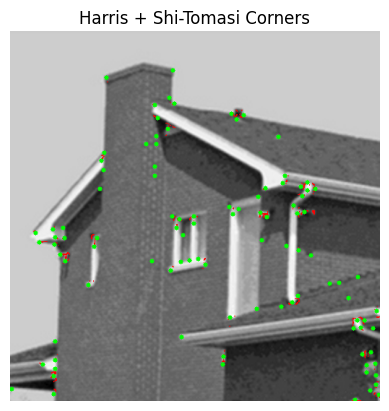

In [14]:
#detect corner
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('house.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris Detector
gray = np.float32(gray)
harris = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
img[harris > 0.01 * harris.max()] = [0, 0, 255]

# Shi-Tomasi Detector
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)
for c in np.intp(corners): 
    x, y = c.ravel(); 
    cv2.circle(img, (x, y), 3, (0,255,0), -1)

# Show Result

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris + Shi-Tomasi Corners')
plt.axis('off')
plt.show()

In [18]:
import cv2
img = cv2.imread('fruits.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(nfeatures=1000)
keypoints, descriptors = orb.detectAndCompute(gray, None)
output = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0))
cv2.imshow('ORB Keypoints', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

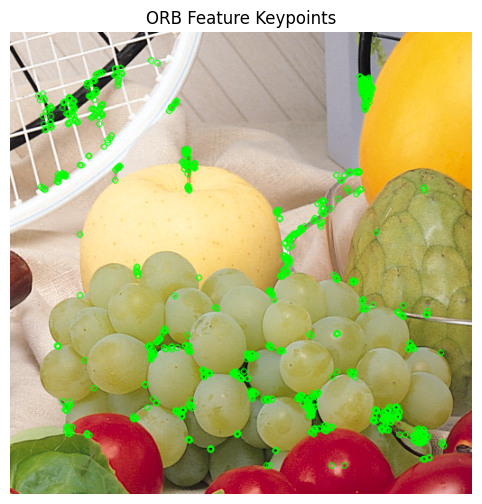

In [16]:
#ORB sample
import cv2
import matplotlib.pyplot as plt

# 1. Baca imej dan tukar kepada grayscale
img = cv2.imread('fruits.png')  # Gantikan dengan nama fail sebenar
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Cipta objek ORB
orb = cv2.ORB_create(nfeatures=1000)

# 3. Kesan keypoints dan compute descriptors
keypoints, descriptors = orb.detectAndCompute(gray, None)

# 4. Lukis keypoints pada imej asal
img_keypoints = cv2.drawKeypoints(img, keypoints, None, color=(0, 255, 0), flags=0)

# 5. Papar imej dengan matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_keypoints, cv2.COLOR_BGR2RGB))
plt.title('ORB Feature Keypoints')
plt.axis('off')
plt.show()

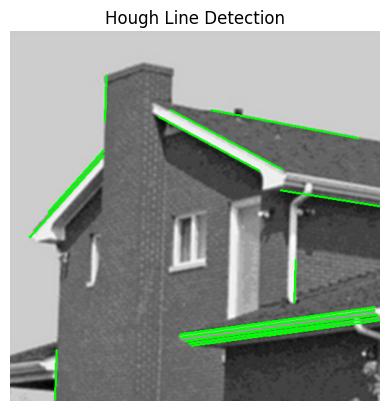

In [22]:
#hough transform 
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image
img = cv2.imread('house.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)

# Apply Hough Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# Draw lines
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show result using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Detection')
plt.axis('off')
plt.show()


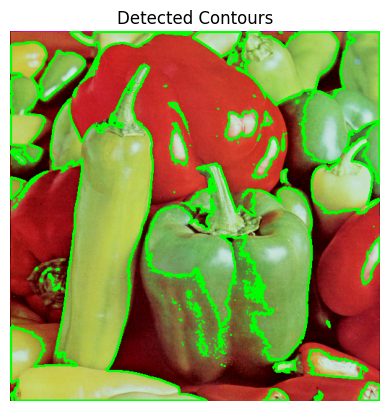

In [23]:
#contour detection
import cv2
import matplotlib.pyplot as plt

# Read and preprocess image
img = cv2.imread('peppers.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a copy
img_contour = img.copy()
cv2.drawContours(img_contour, contours, -1, (0,255,0), 2)

# Show result
plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))
plt.title('Detected Contours')
plt.axis('off')
plt.show()